In [1]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

In [2]:
def filtering(data_path, low_freq, high_freq):
    signal, sr = sf.read(data_path)

    fft_result = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(len(signal), 1/sr)

    mask = (np.abs(frequencies) >= low_freq) & (np.abs(frequencies) <= high_freq)

    filtered_fft = np.zeros_like(fft_result)
    filtered_fft[mask] = fft_result[mask]

    filtered_signal = np.fft.ifft(filtered_fft).real

    sf.write(f'output/filtered_output_{low_freq}_{high_freq}.wav', filtered_signal, sr)


In [3]:
filtering('data/mixed_q1.wav', 100, 250)
filtering('data/mixed_q1.wav', 600, 900)

In [ ]:
def plot_fft(signal, sr, title):
    fft_vals = np.fft.rfft(signal)
    fft_freqs = np.fft.rfftfreq(len(signal), 1 / sr)

    magnitude = np.abs(fft_vals)

    plt.figure(figsize=(14, 5))
    plt.plot(fft_freqs, magnitude, alpha=0.7)
    plt.title(f'Frequency Spectrum - {title}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

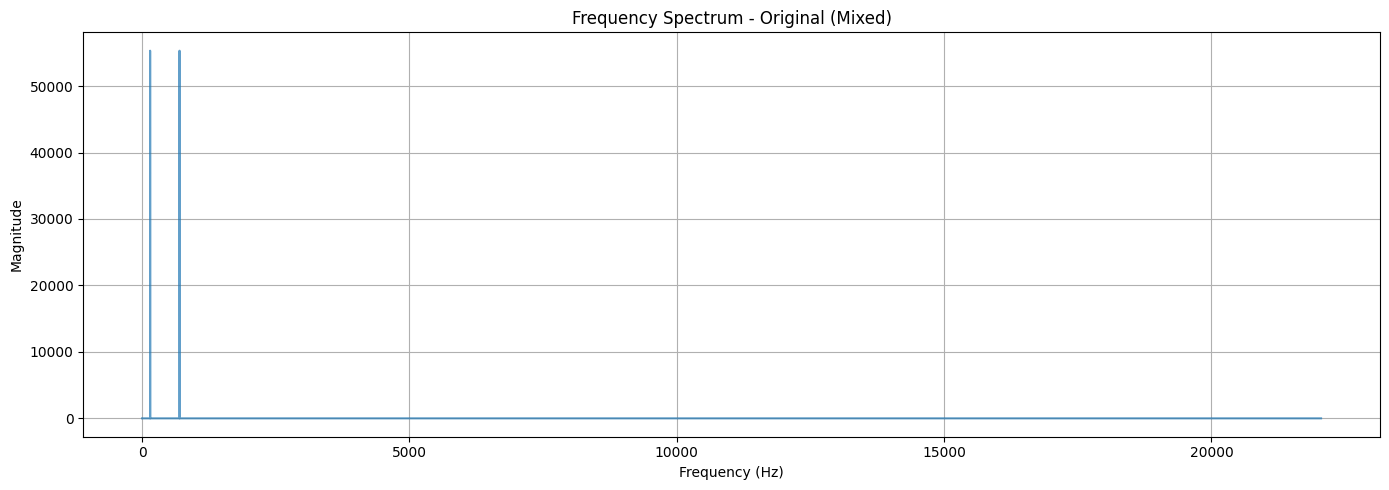

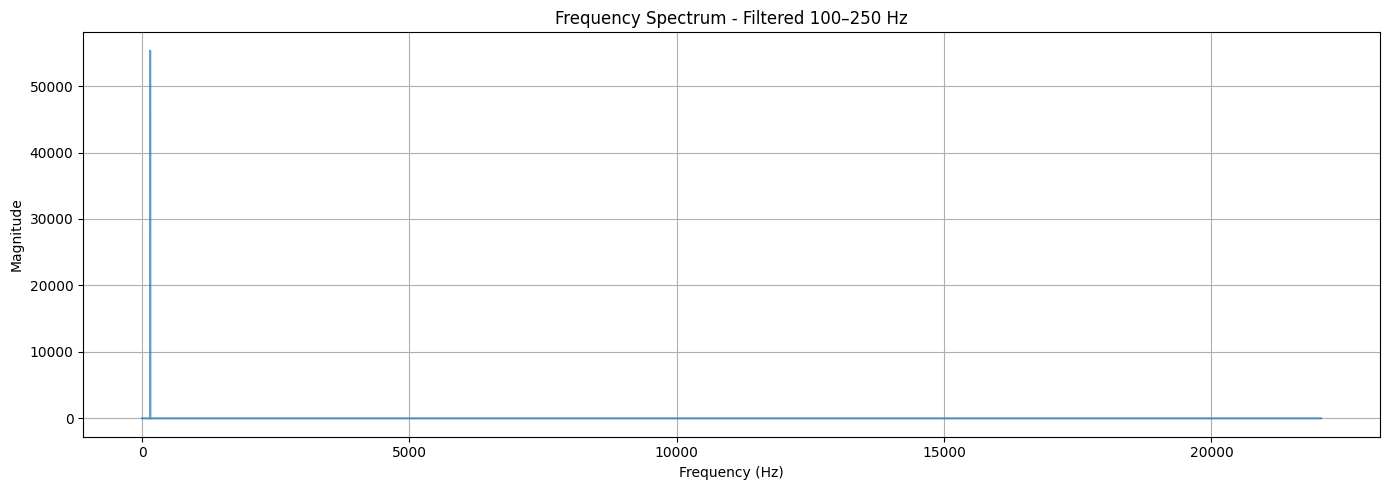

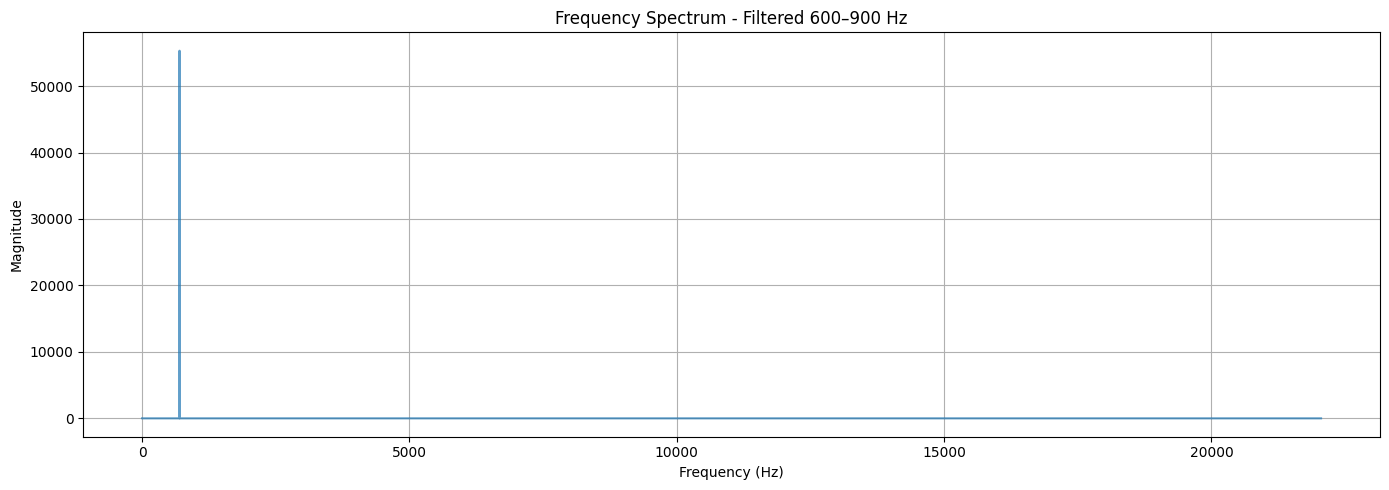

In [ ]:
signal, sr = sf.read('data/mixed_q1.wav')
signal2, sr2 = sf.read('output/filtered_output_100_250.wav')
signal1, sr1 = sf.read('output/filtered_output_600_900.wav')

plot_fft(signal, sr, 'Original (Mixed)')
plot_fft(signal2, sr2, 'Filtered 100–250 Hz')
plot_fft(signal1, sr1, 'Filtered 600–900 Hz')